## Week 5 Assignment

## Task:House Price Prediction - Linear Regression
Perform Data Preprocessing and feature engineering 
 


## Assignment Summary Sheet
## Objective
To apply Data Preprocessing and Feature Engineering on a house price dataset and build a model that predicts property prices accurately using Linear Regression.

## Dataset Descriptions

| **Feature Name**   | **Description**                                               |
| ------------------ | ------------------------------------------------------------- |
| `Area`             | Total area of the house (in sqft)                             |
| `Bedrooms`         | Number of bedrooms                                            |
| `Bathrooms`        | Number of bathrooms                                           |
| `FurnishingStatus` | Type of furnishing (Furnished / Semi-furnished / Unfurnished) |
| `Location`         | Area or locality of the property                              |
| `Price`            | Target variable — House price in ₹                            |


## Data Preprocessing
Handled missing values using fillna() or dropna().

Converted binary categories like yes/no into 1/0.


Converted all features into numeric types for model training.

Removed outliers using domain knowledge and visualizations.

## Feature Engineering
Used correlation heatmap to identify most important features.

Performed One-Hot Encoding for categorical variables like Location.

Dropped low-variance or irrelevant features.

Considered domain logic (e.g., mapping FurnishingStatus manually).

## Visualizations & EDA
Distribution Plot for Price to understand skewness.

Scatter Plot between Area and Price to check linearity.

Heatmap to show correlation between features and price.

## Model Training
Used Linear Regression from sklearn.linear_model.

Split data into training and test sets using train_test_split.

Trained model on processed and encoded dataset.

## Model Evaluation
Metric	Value

Model	Linear Regression

R2 Score: 0.5589794483892101

RMSE: 1493040.3069592784

## Conclusion
The model explains ~56% of the variance in house prices.

Predictions have an average error of ~₹14.9 Lakh.



In [81]:
#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
#  Step 2: Load the Dataset

df = pd.read_csv("Housing.csv") 
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [83]:
#  Step 3: Explore the Data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [84]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [85]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

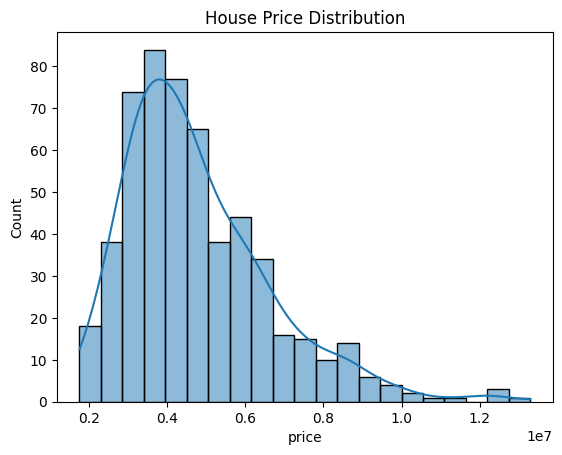

In [86]:
#  Step 4: Visualization
sns.histplot(df['price'], kde=True)
plt.title("House Price Distribution")
plt.show()



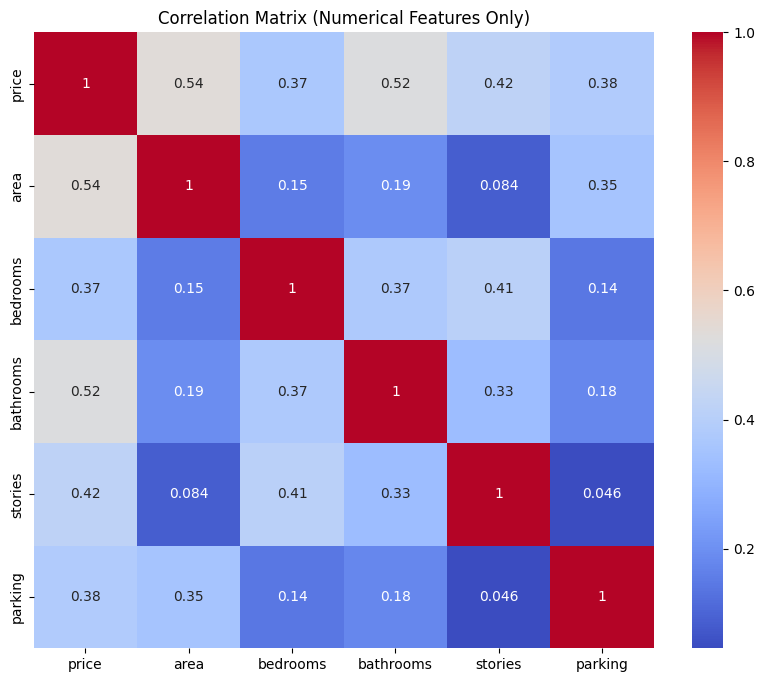

In [87]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()




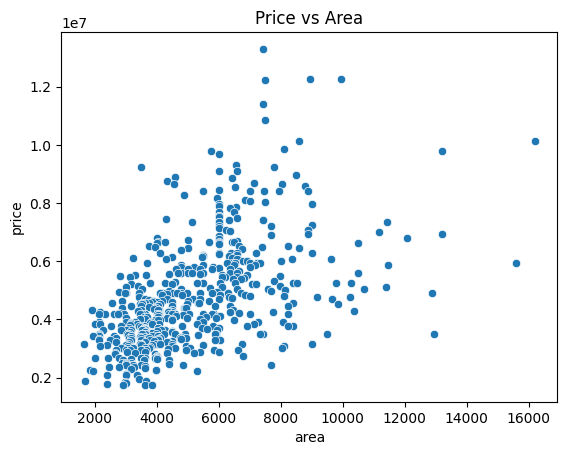

In [88]:
sns.scatterplot(x='area', y='price', data=df)
plt.title("Price vs Area")
plt.show()


In [89]:
#  Step 5: Data Preprocessing
df.fillna(df.mean(numeric_only=True), inplace=True)

if 'Location' in df.columns:
    df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [91]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [92]:
#  Step 6: Feature Engineering
if 'Area' in df.columns:
    df['PricePerSqft'] = df['Price'] / df['Area']
    df['LogPrice'] = np.log(df['Price'])

In [ ]:
# Converting non-numeric columns into numeric

non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())


Non-numeric columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [101]:
for col in non_numeric_cols:
    if df[col].nunique() == 2:
        df[col] = df[col].map({'yes': 1, 'no': 0})
    elif col == "furnishingstatus":
        df[col] = df[col].map({'furnished': 1, 'semi-furnished': 0, 'unfurnished': -1})
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)


In [102]:
#  Step 7: Define Features and Target
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
#  Step 8: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df

Intercept: 49167.72307177726


,Coefficient
area,3.008286e+02
bedrooms,1.445377e+05
bathrooms,1.154901e+06
stories,4.640702e+05
parking,2.945196e+05
furnishingstatus,1.617273e+05
mainroad_0,4.066879e+04
mainroad_1,6.052927e+04
guestroom_0,4.066879e+04
guestroom_1,6.052927e+04


R2 Score: 0.5589794483892101
RMSE: 1493040.3069592784


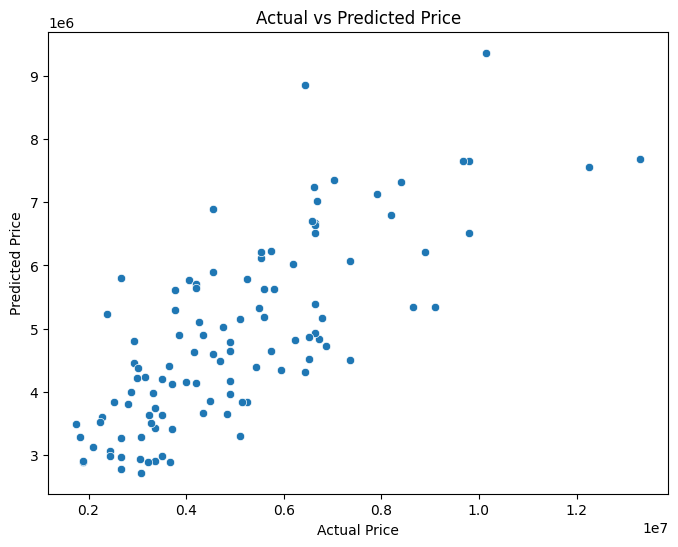

In [104]:
#  Step 9: Predictions & Evaluation
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()